Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

### Q1. Load the dataset 

In [3]:
df_parkinsons = pd.read_csv('parkinsons.csv')
df_parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df_parkinsons.shape

(195, 24)

In [5]:
df_parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [6]:
df_parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Status is the target variable in which the minimun value is 0 and maximum value is 1 and there are 195 records

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [7]:
df_parkinsons.status.value_counts()

1    147
0     48
Name: status, dtype: int64

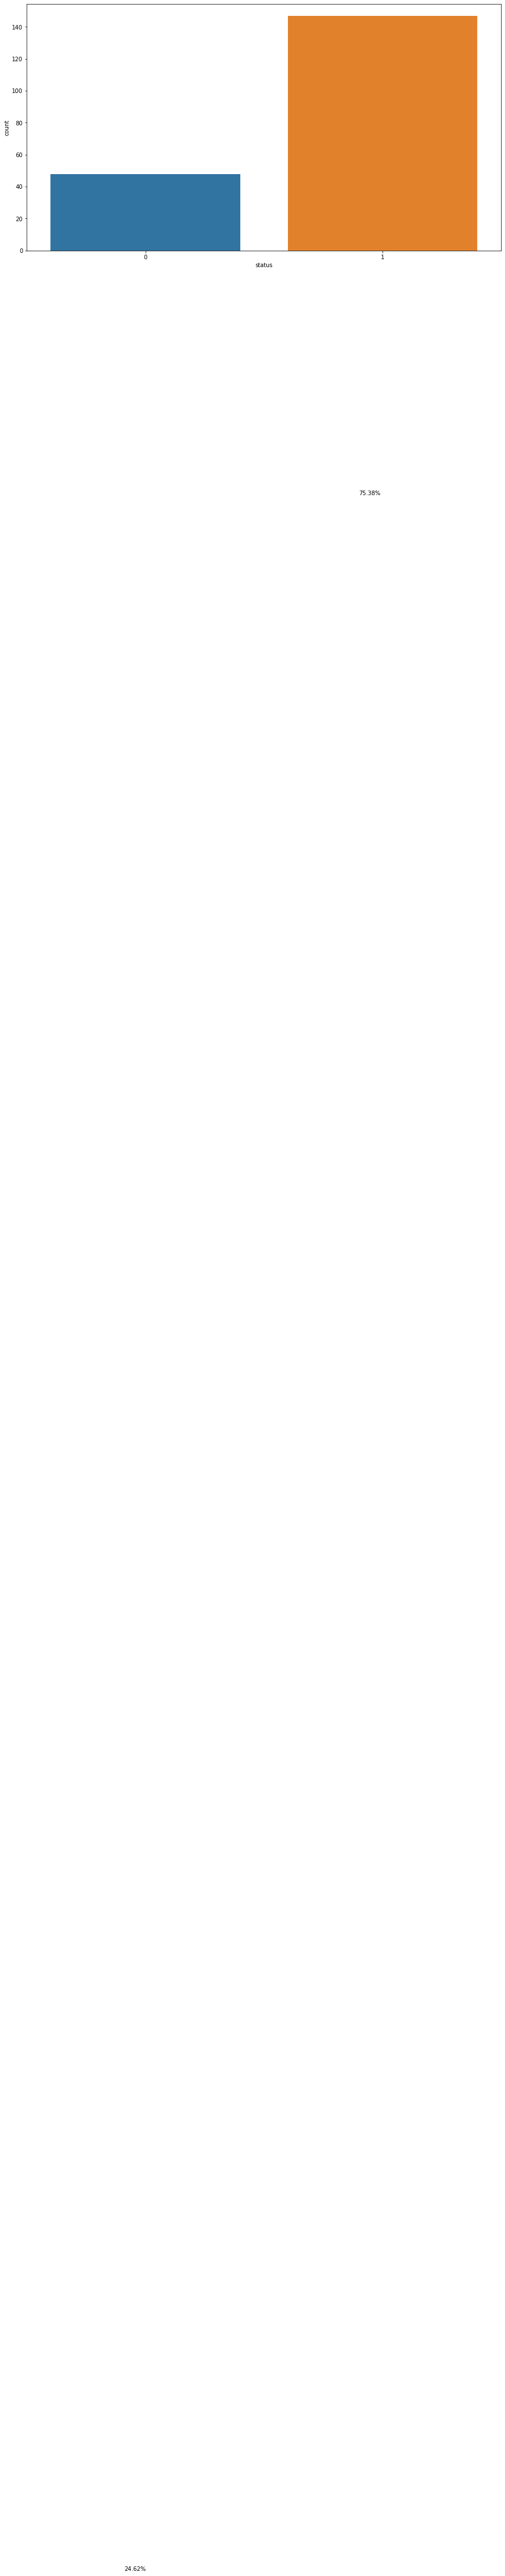

In [8]:
df_target = df_parkinsons['status']

sns.countplot(x=df_target)

plt.text(x = -0.09, y = df_target.value_counts()[0] - 1500, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.90, y = df_target.value_counts()[1] - 300, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

plt.show()

The percentage of patients detecting with parkinsons disease is 24.62% of that of the patients not having parkinsons disease is 74.38%.So,we can say that the classes are fairly classified

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [9]:
null_values = df_parkinsons.isnull().sum().sort_values(ascending=False)
null_percentage = (df_parkinsons.isnull().sum()/df_parkinsons.isnull().count()).sort_values(ascending=False)
null = pd.concat([null_values,null_percentage],keys=['Null_values','Null_percentage'],axis=1)
null

,Null_values,Null_percentage
name,0,0.0
MDVP:Fo(Hz),0,0.0
D2,0,0.0
spread2,0,0.0
spread1,0,0.0
DFA,0,0.0
RPDE,0,0.0
status,0,0.0
HNR,0,0.0
NHR,0,0.0


### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [10]:
distribution = df_parkinsons.iloc[:,1:]

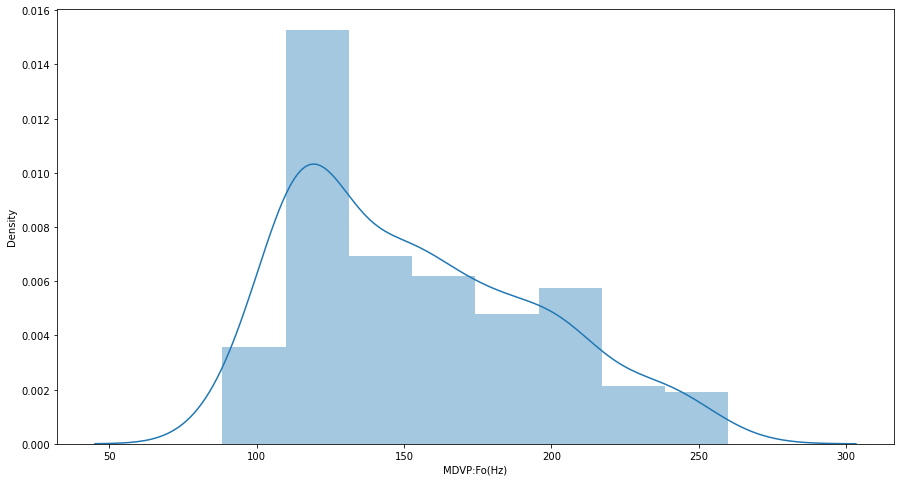

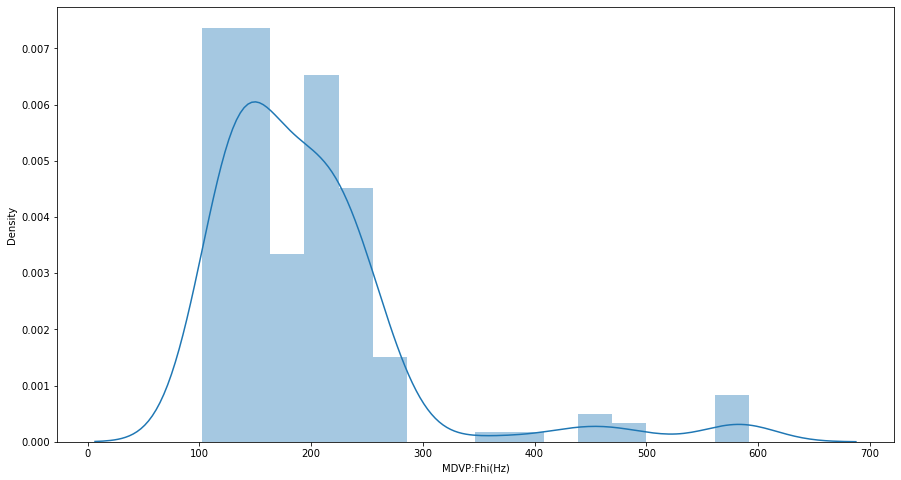

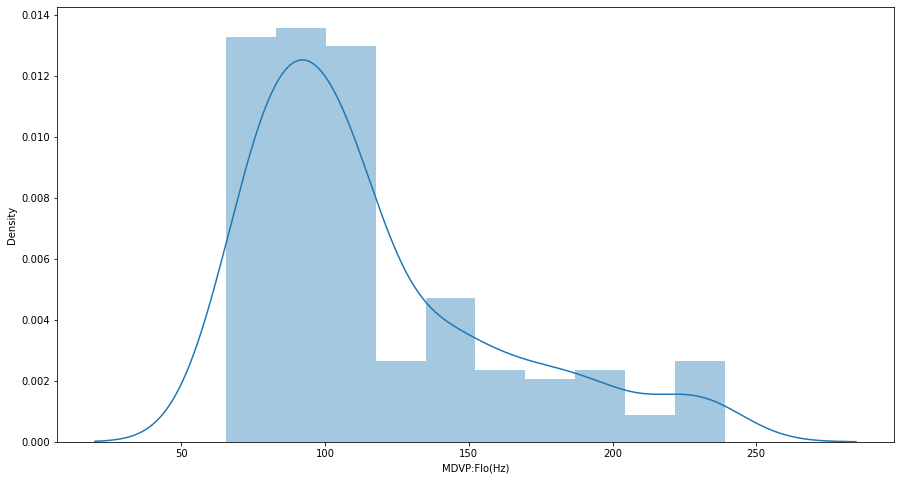

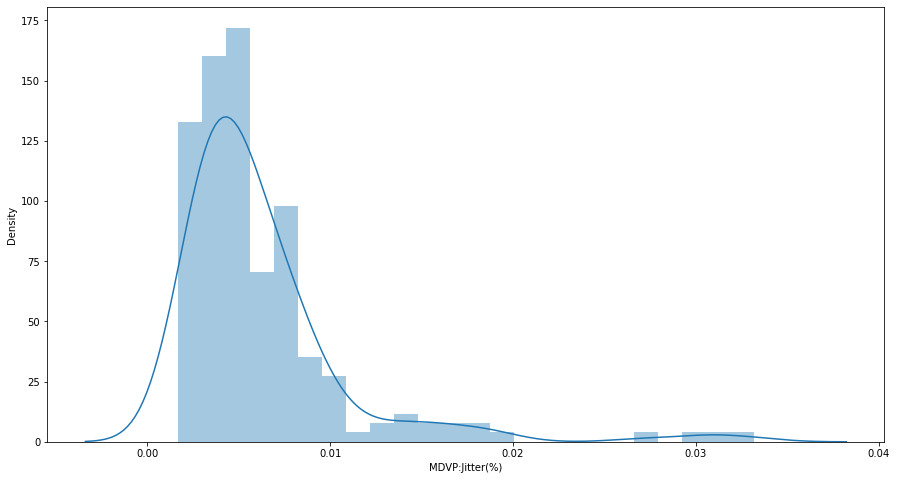

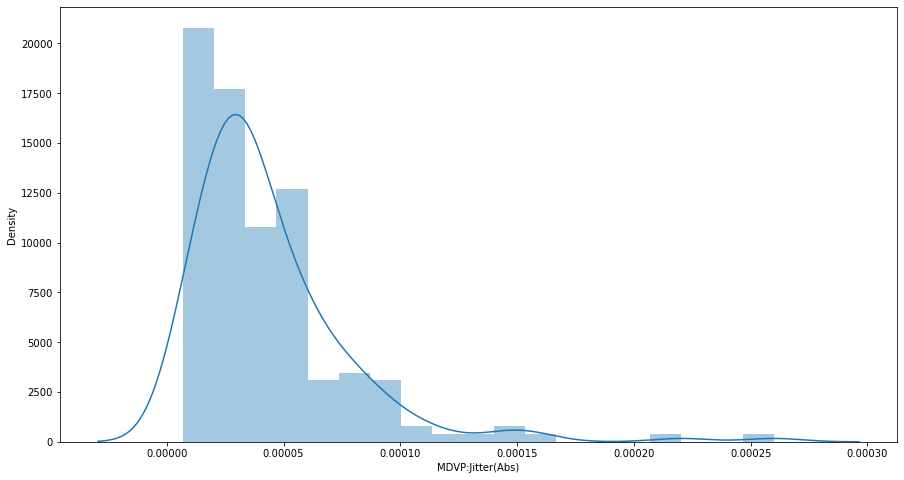

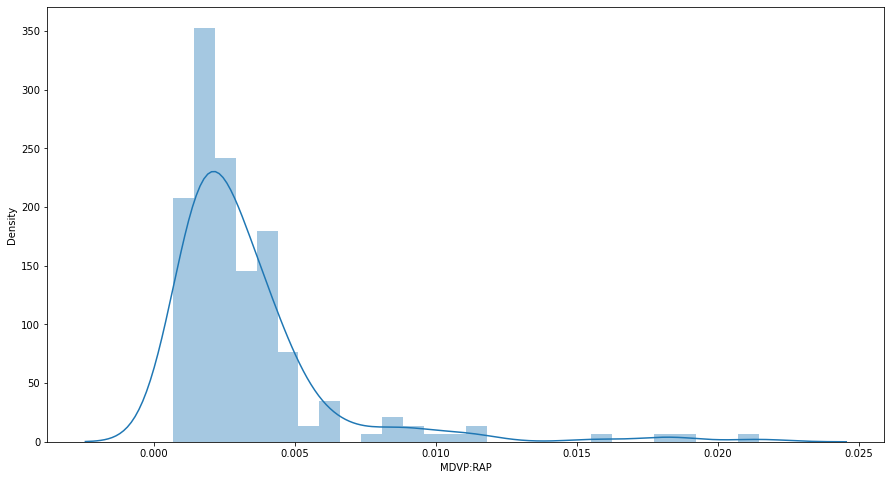

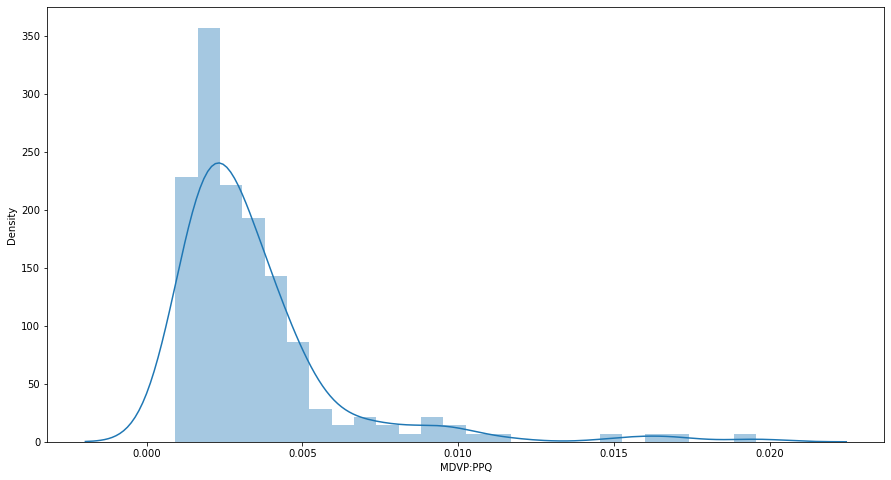

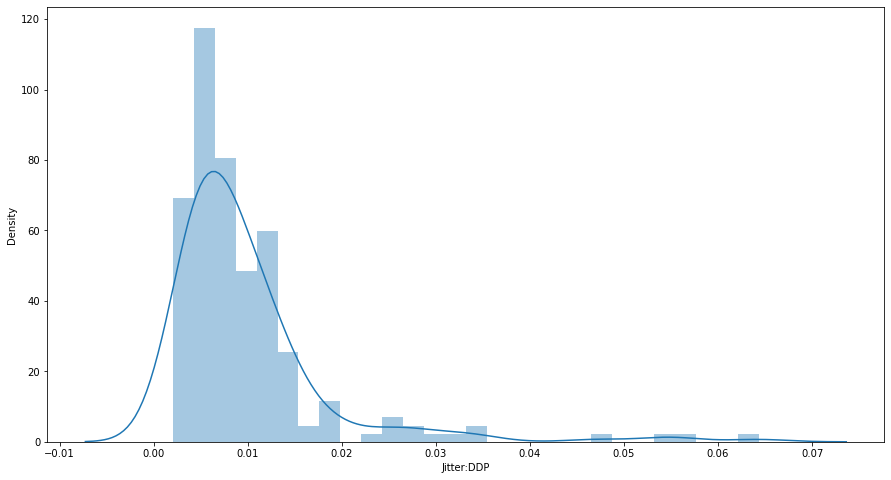

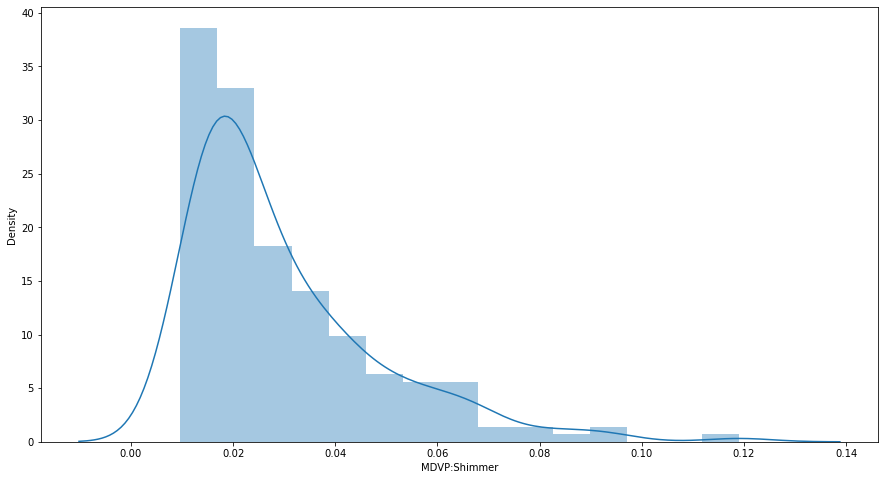

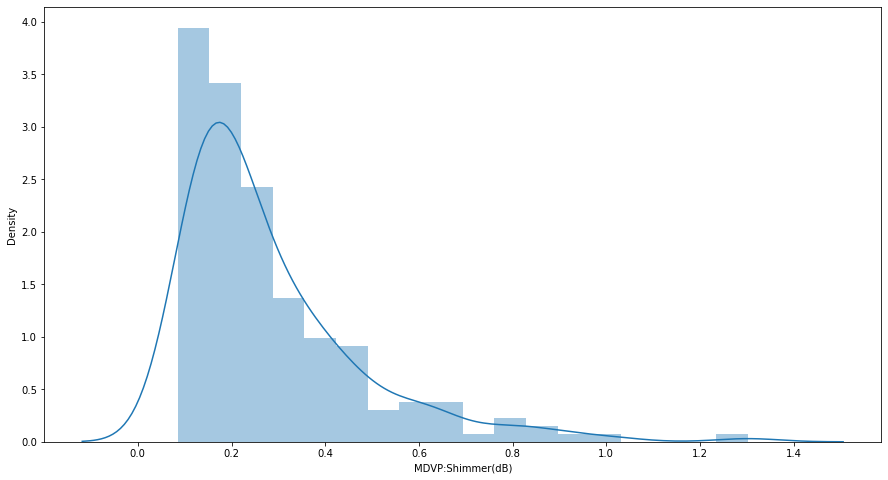

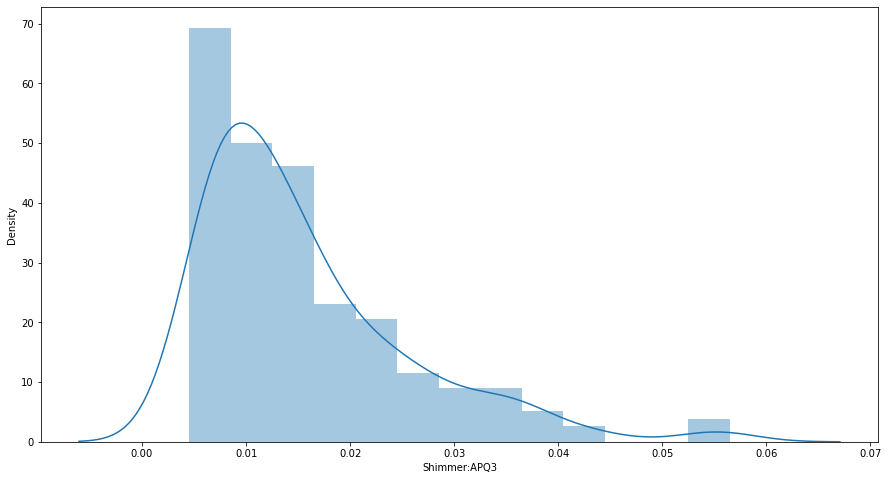

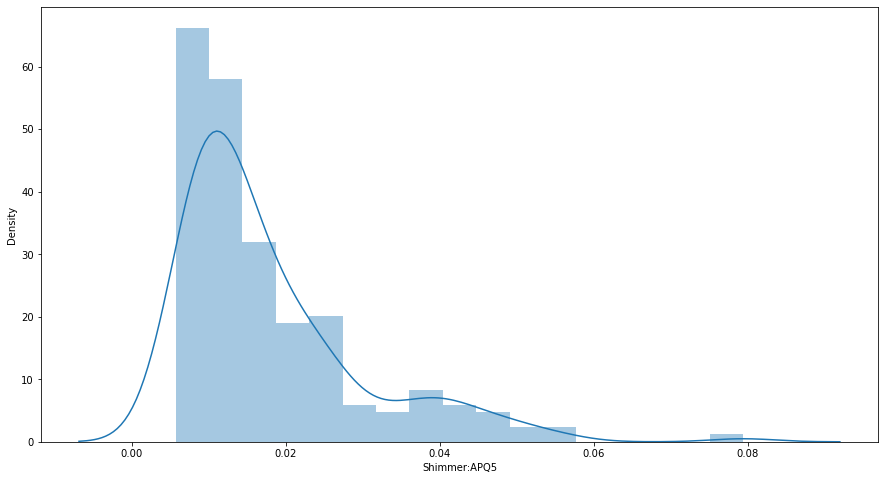

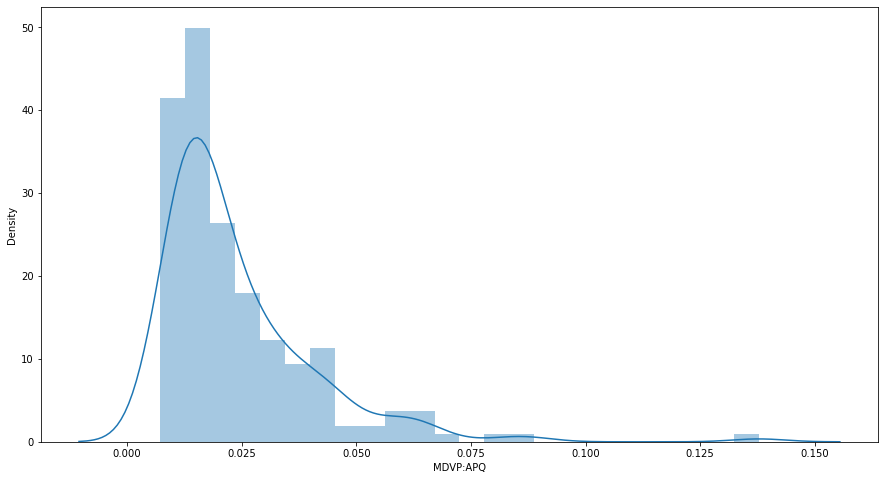

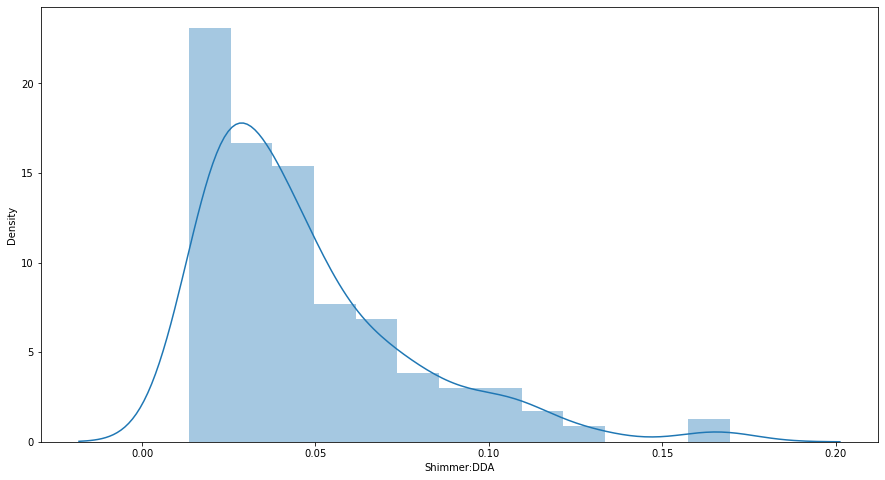

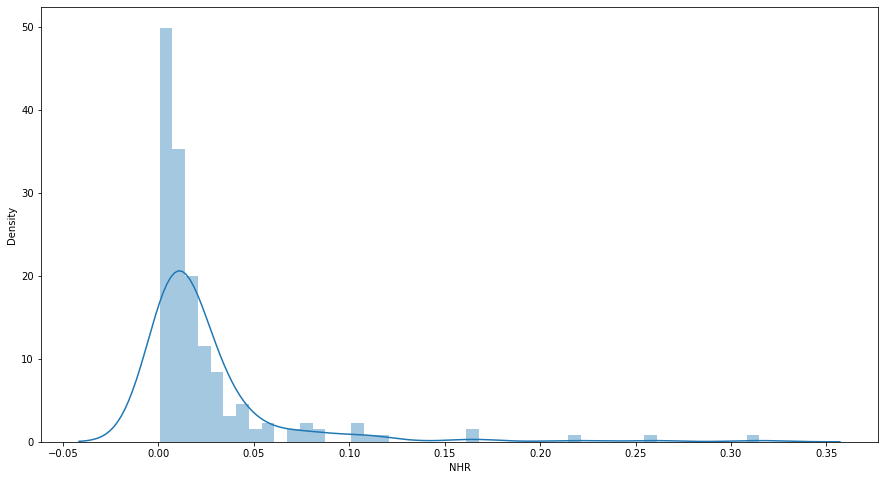

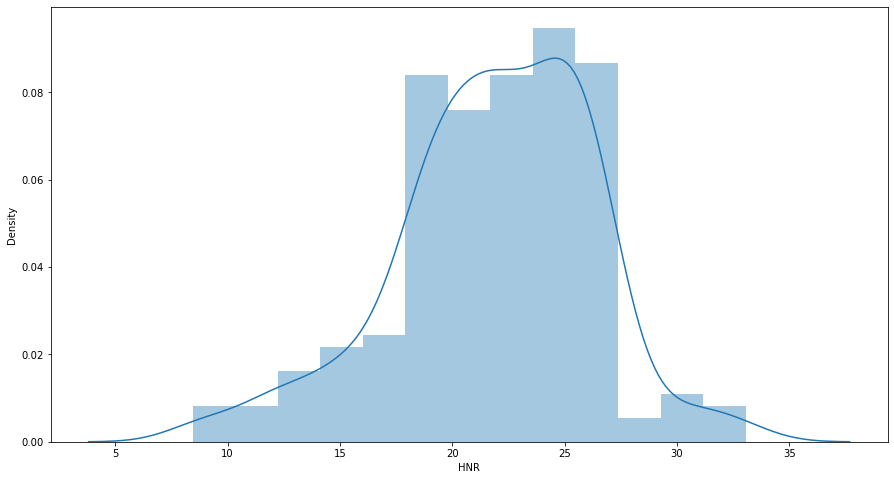

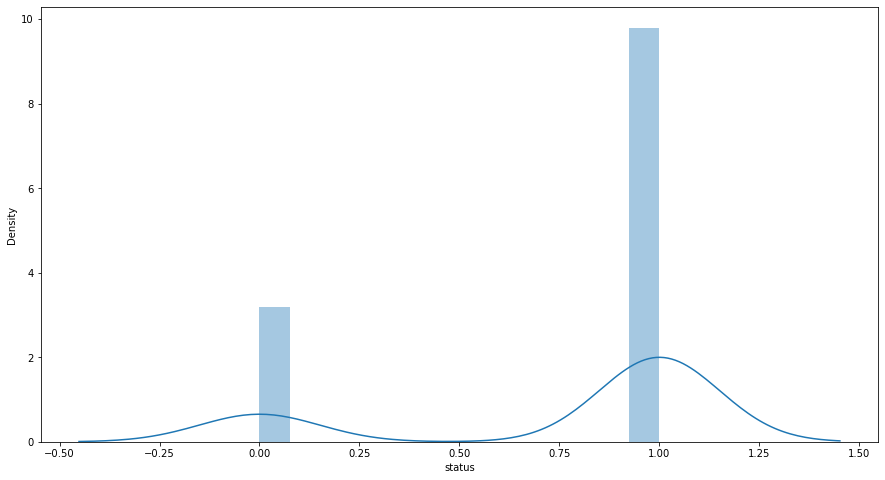

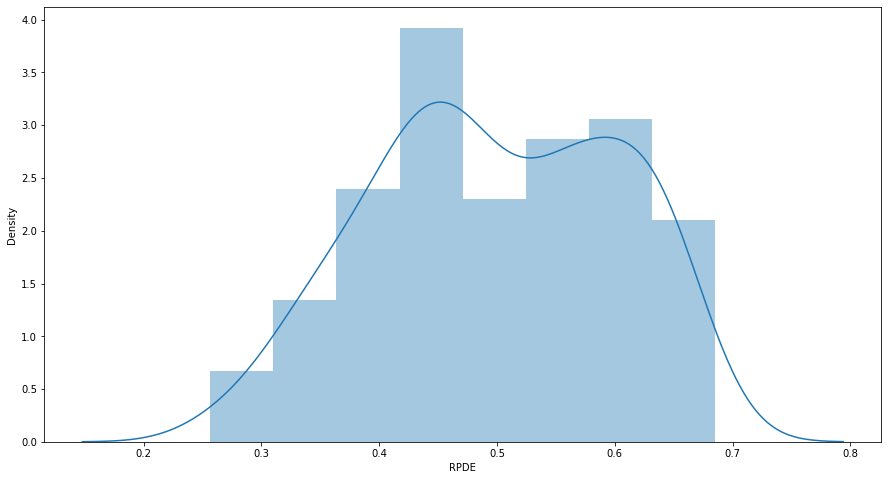

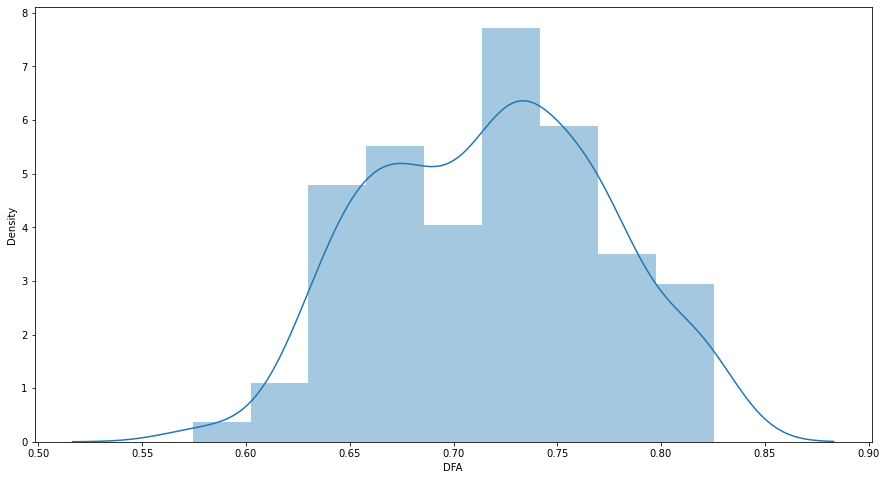

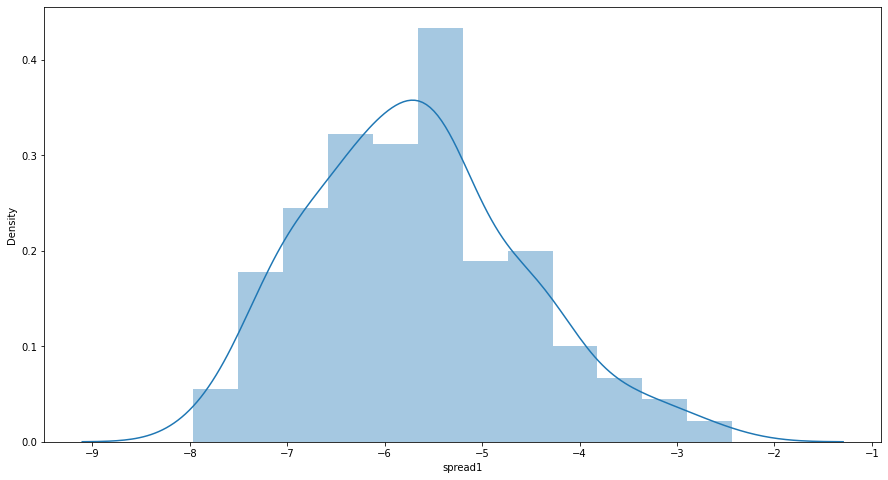

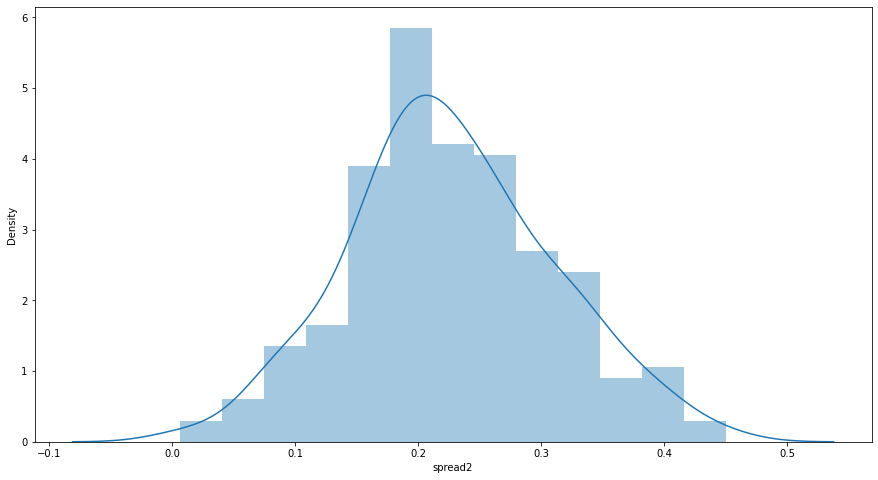

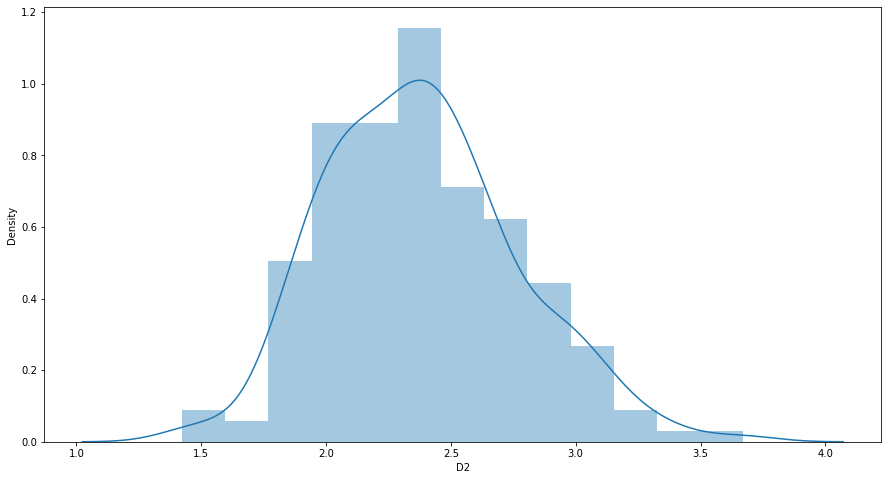

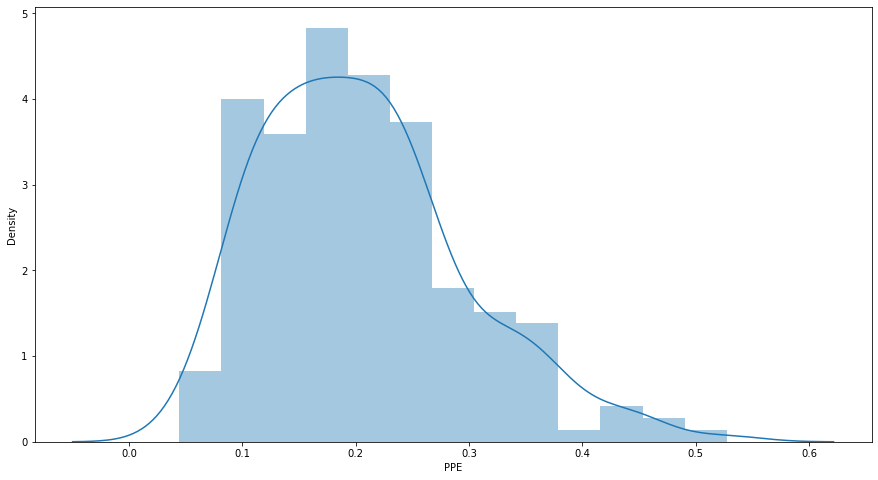

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [11]:
for col in distribution:
    sns.distplot(distribution[col])
    plt.show()
    
distribution.skew()

Most of the columns are right skewed in the dataset

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

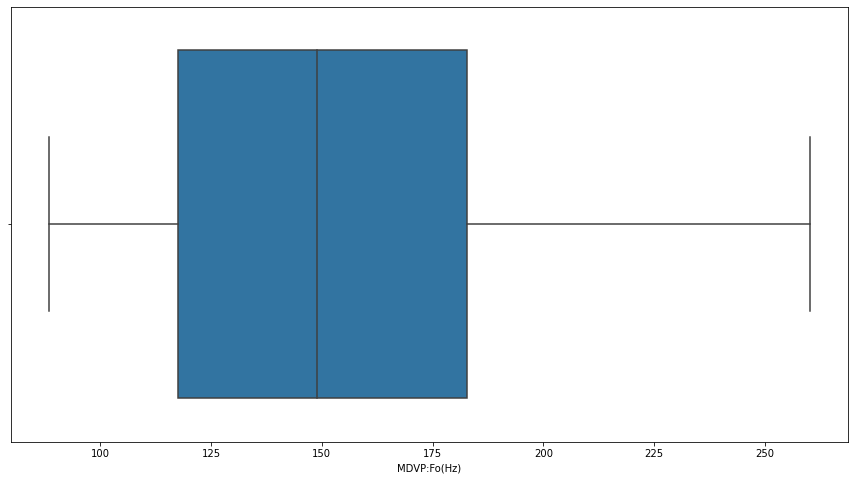

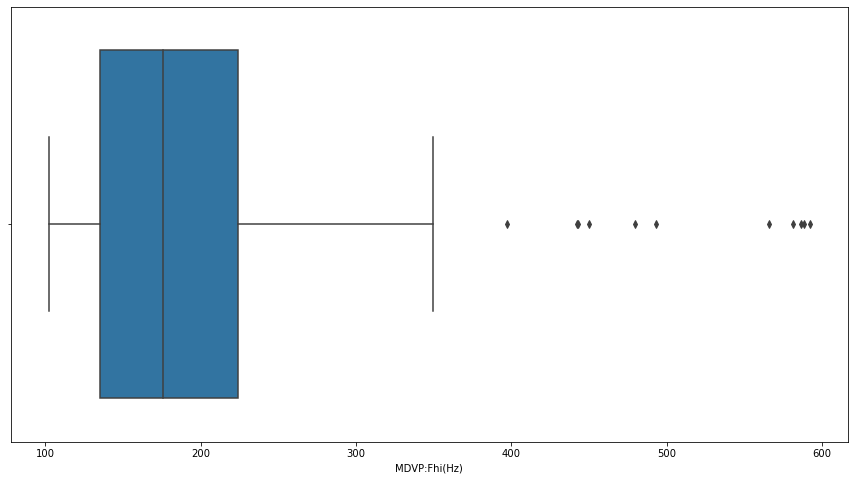

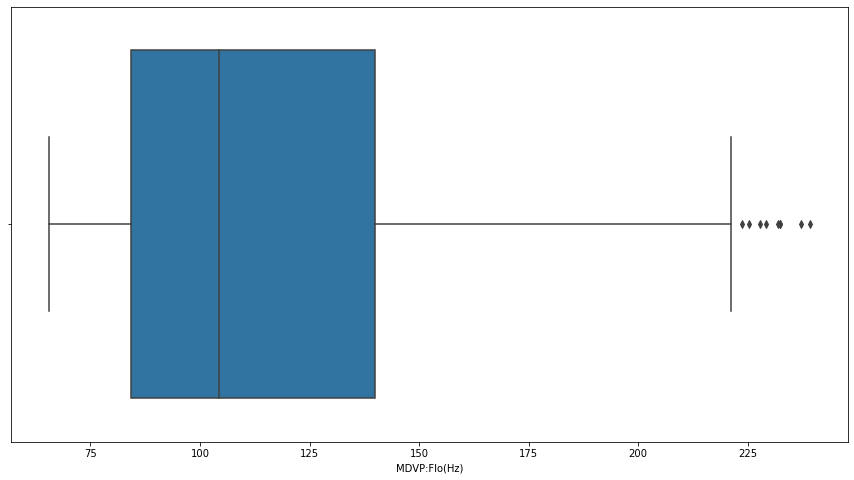

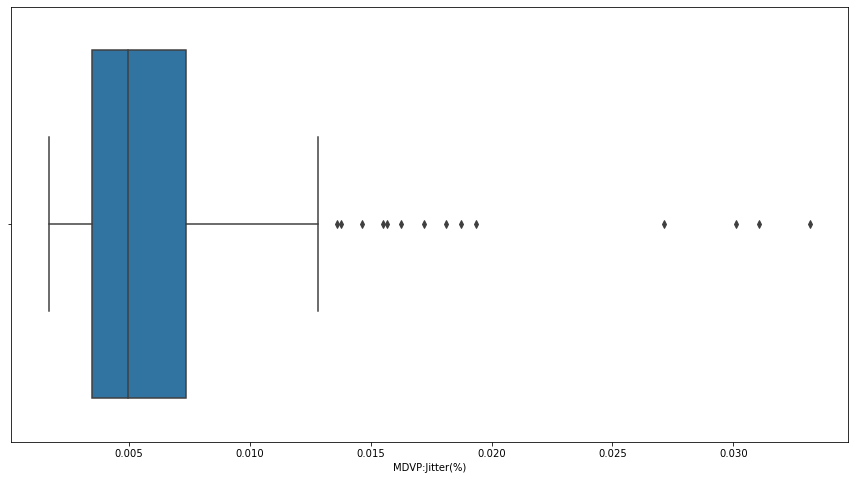

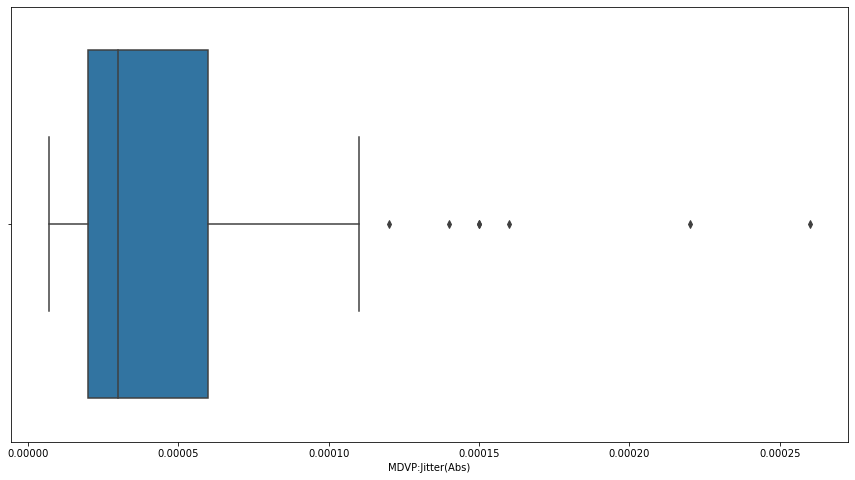

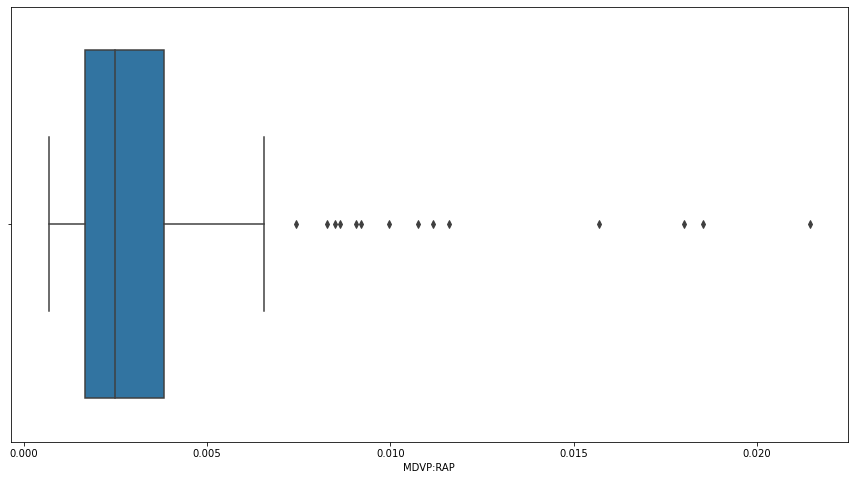

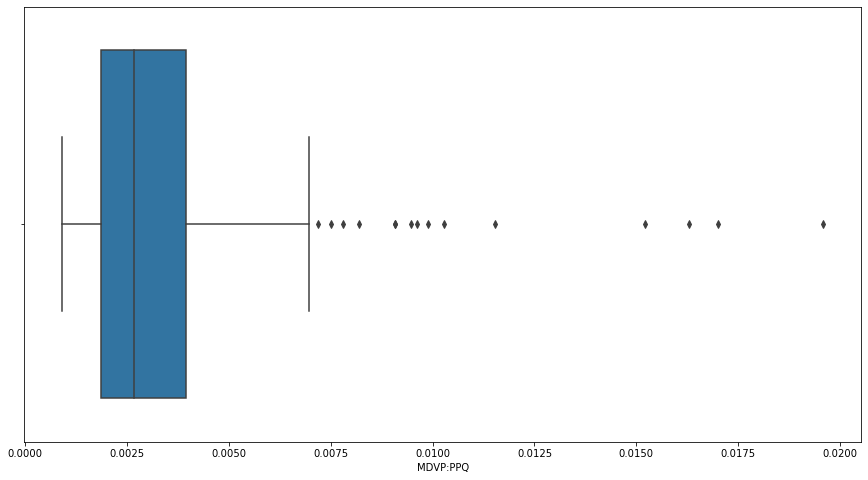

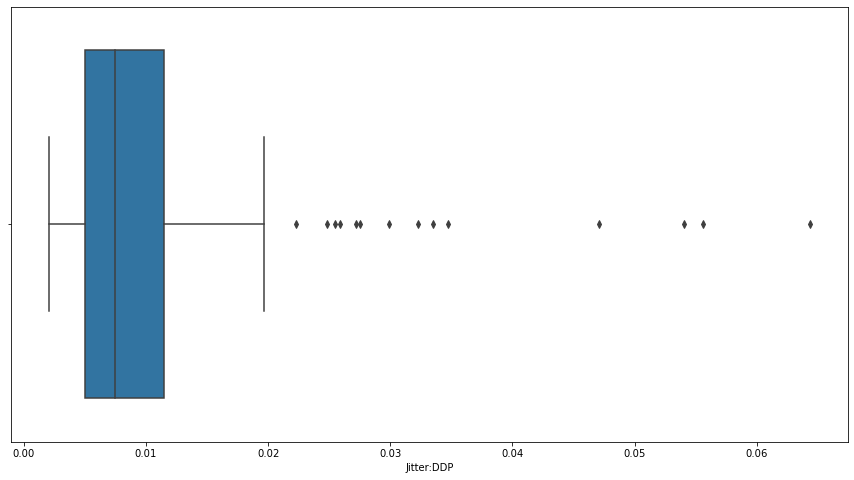

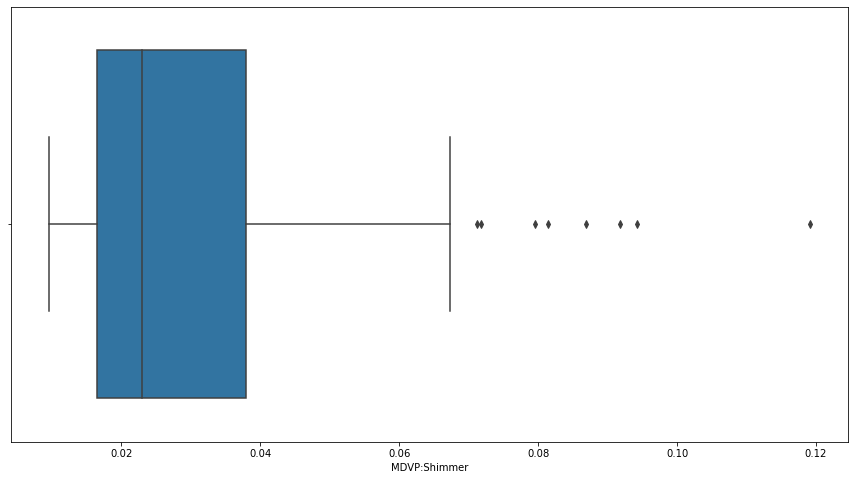

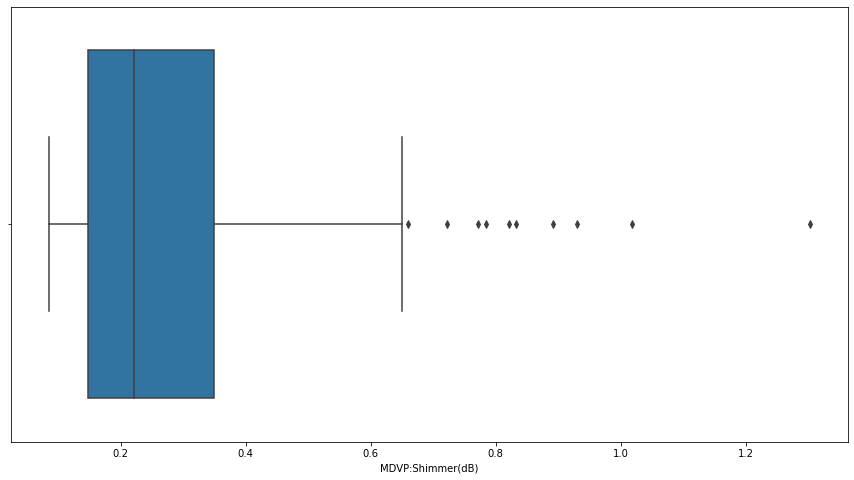

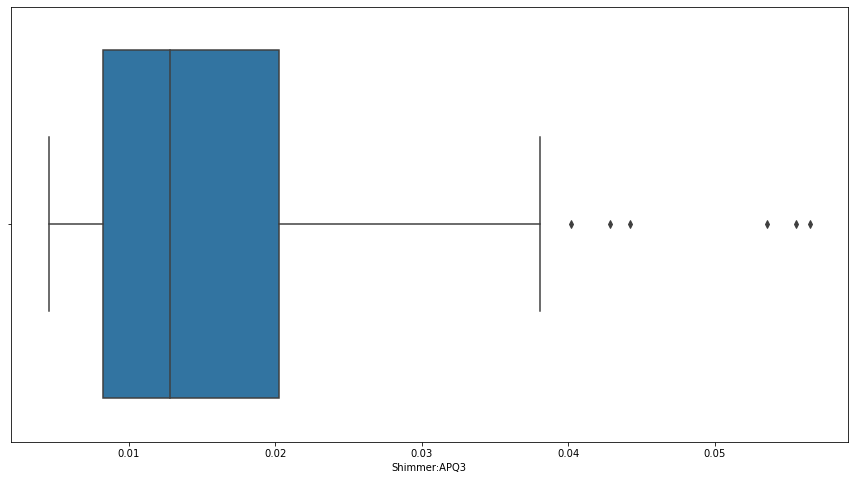

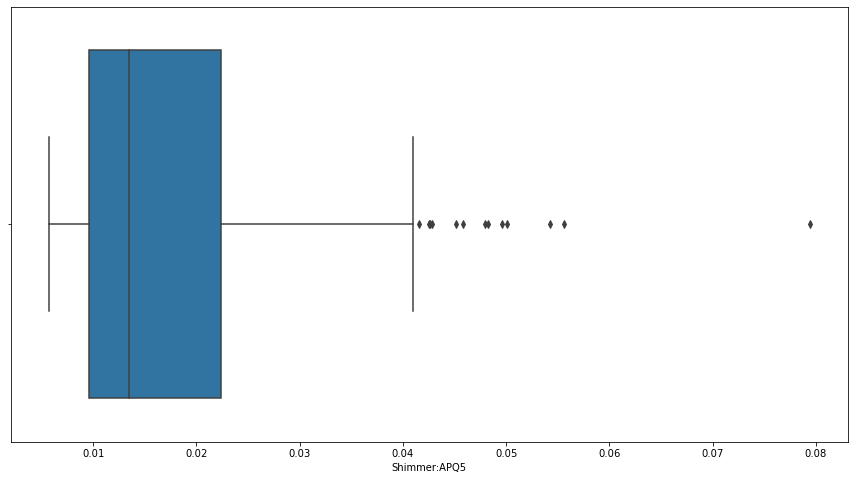

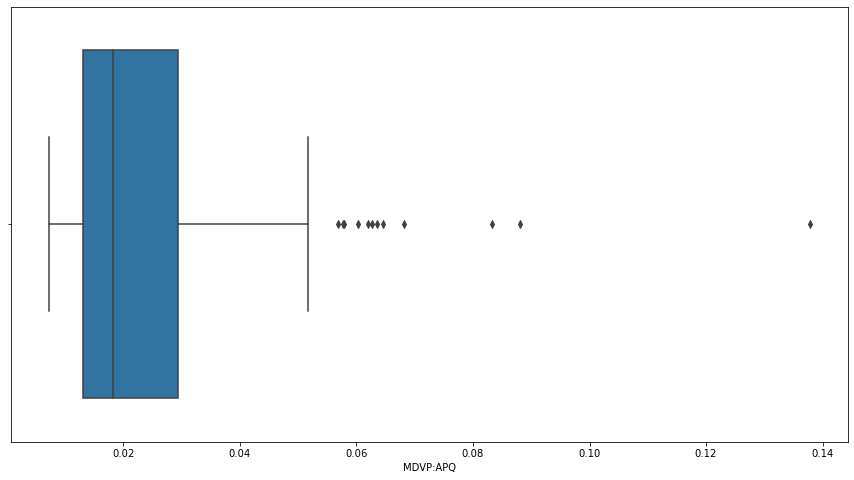

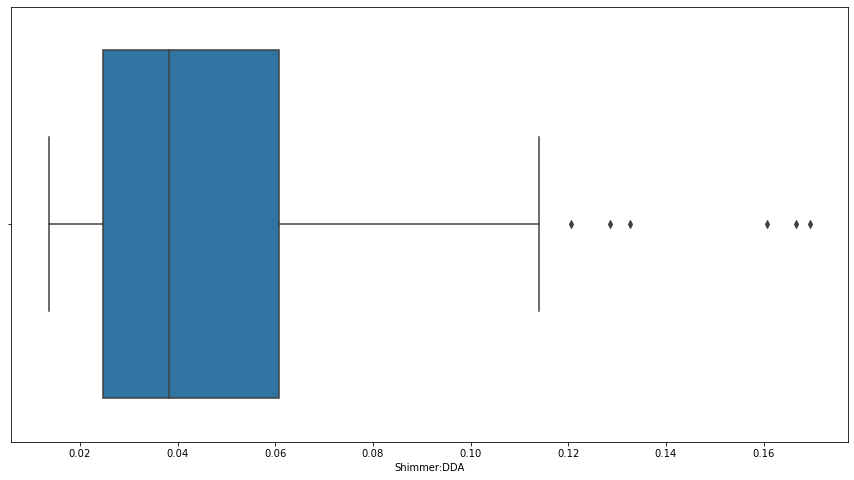

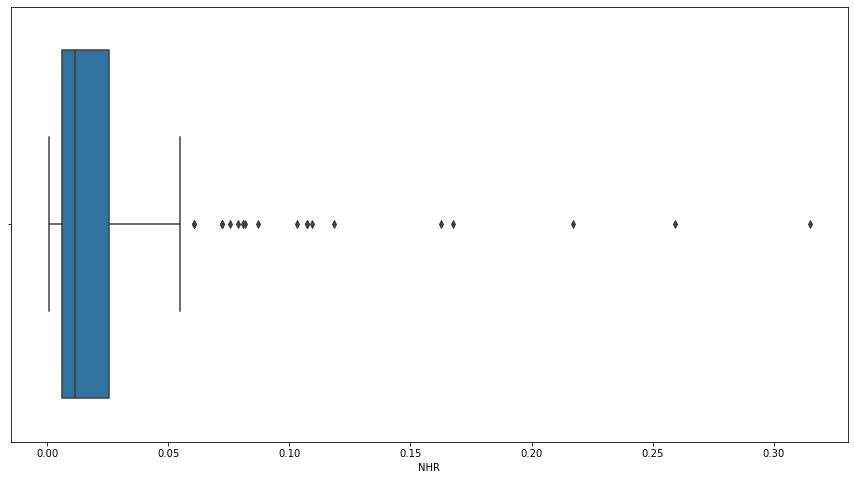

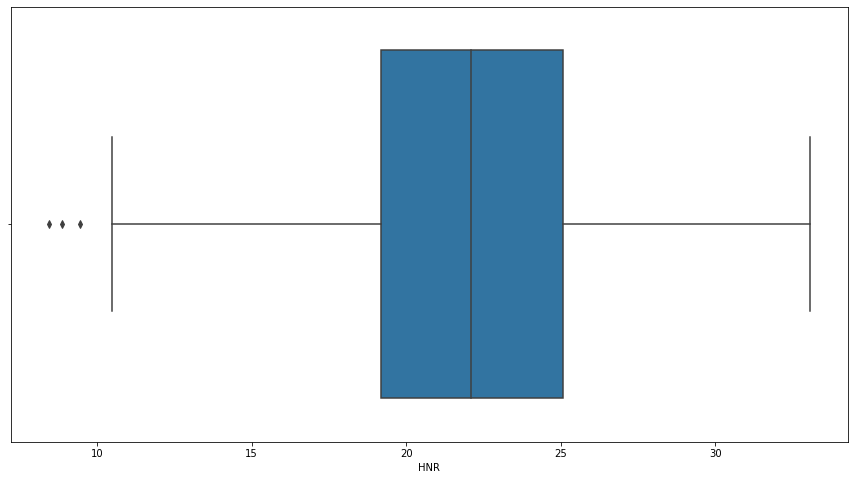

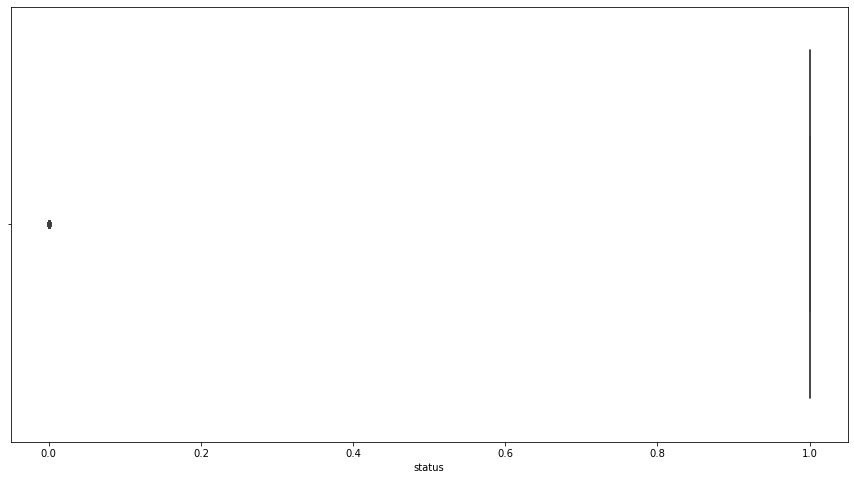

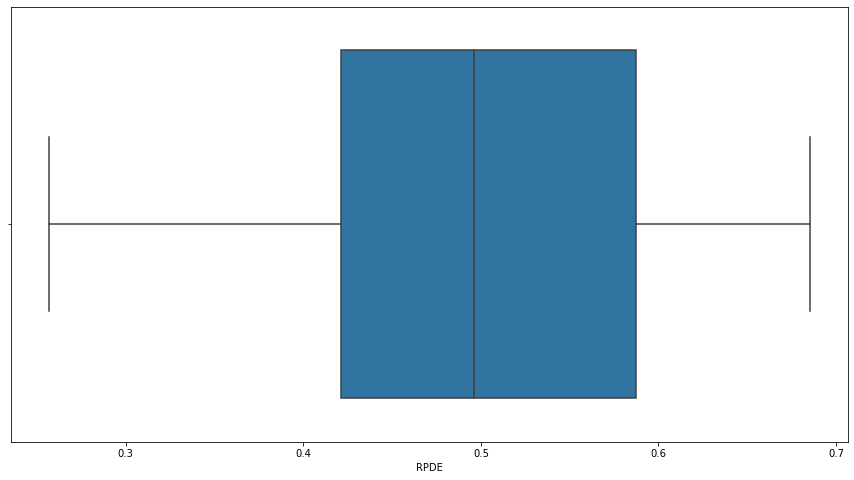

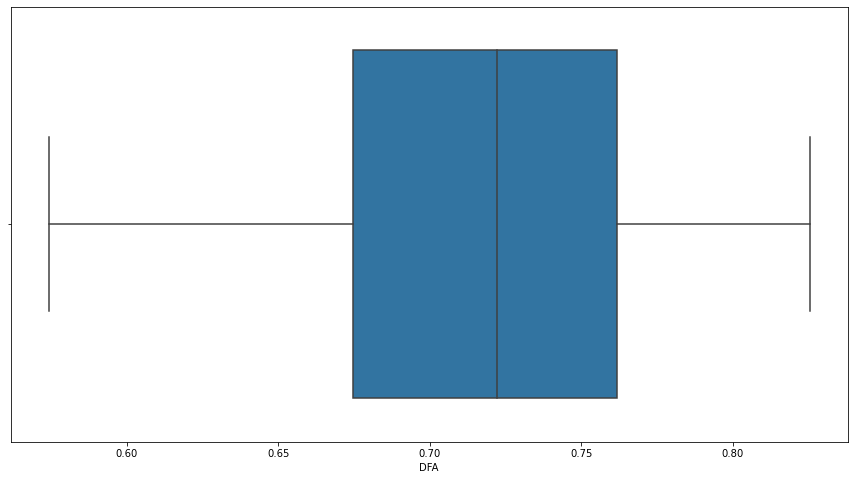

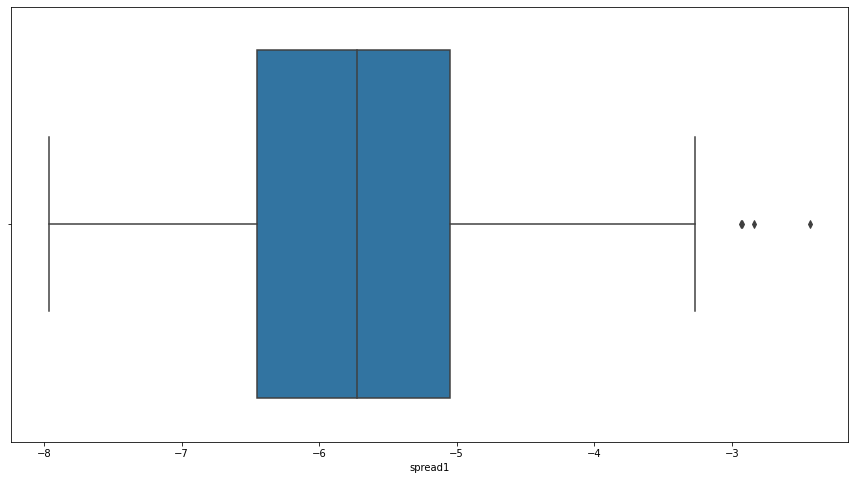

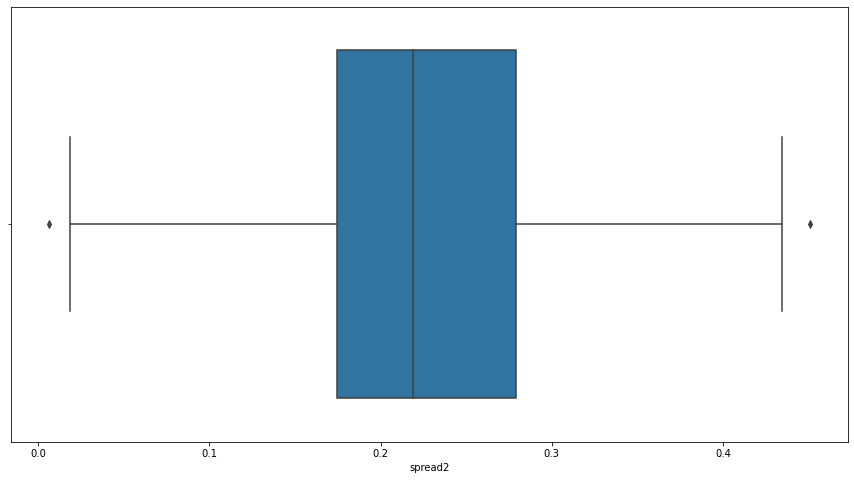

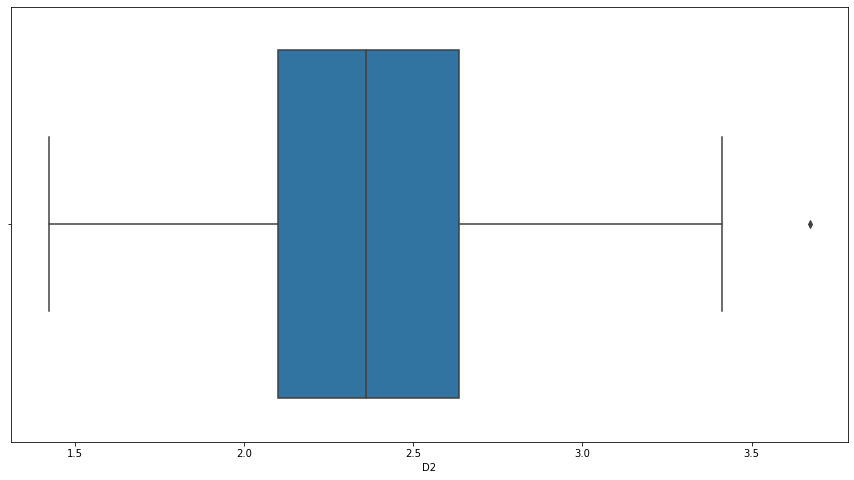

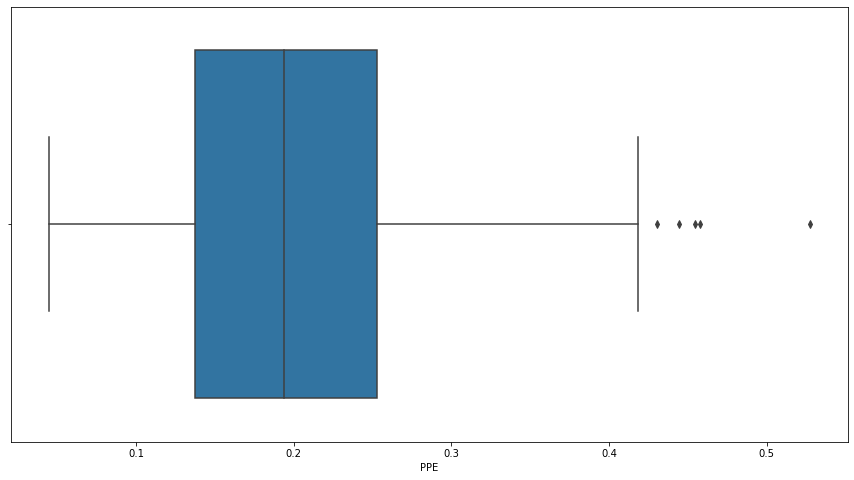

In [12]:
for col in distribution:
    sns.boxplot(distribution[col])
    plt.show()

In [13]:
#Q1 = df_parkinsons.quantile(0.25)
#Q3 = df_parkinsons.quantile(0.75)
#IQR = Q3-Q1
#df_parkinsons = df_parkinsons[~((df_parkinsons<(Q1 - 1.5*IQR)) | (df_parkinsons>(Q3+1.5*IQR))).any(axis=1)]
#df_parkinsons = df_parkinsons.reset_index(drop=True)
#df_parkinsons.shape

### Q7. Are there any strong correlations among the independent features?

In [14]:
df_parkinsons.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


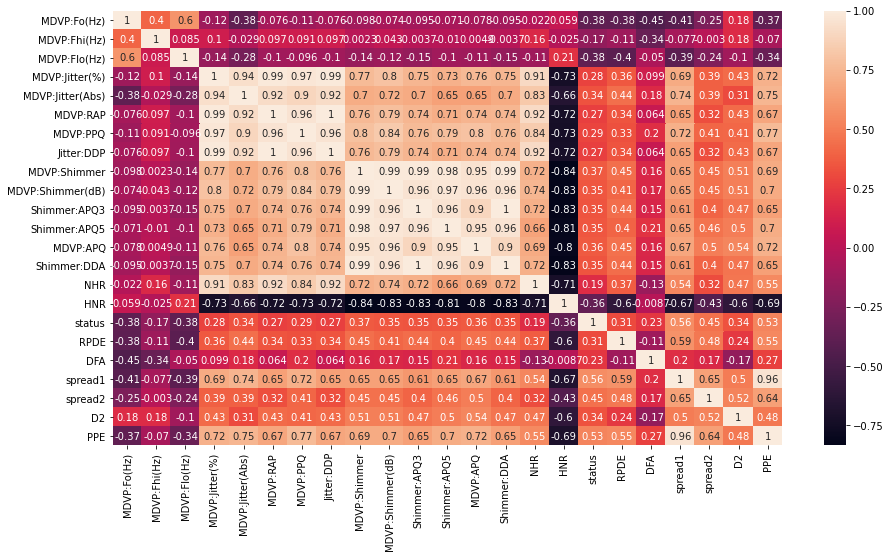

In [15]:
sns.heatmap(df_parkinsons.corr(),annot=True)
plt.show()

### Q8. Split dataset into training & test dataset  

In [16]:
X = df_parkinsons.drop(['status','name'],axis=1)
Y = df_parkinsons['status']
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=1)

### Q9. Create a default decision tree model using criterion = Entropy 

In [17]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree_model = decision_tree.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
print('Accuracy Score of test data',accuracy_score(y_test,y_pred))

Accuracy Score of test data 0.8461538461538461


In [18]:
y_pred_train = decision_tree_model.predict(X_train)
print('Accuracy score of training data',accuracy_score(y_train,y_pred_train))

Accuracy score of training data 1.0


### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [26]:
hyp_parameters = [{'max_depth':range(1,10),'min_samples_leaf':range(1,10)}]

decision_tree_classification = DecisionTreeClassifier(random_state=1)

kf = KFold(n_splits=5,shuffle=True,random_state=1)
decision_grid = GridSearchCV(estimator=decision_tree_classification,param_grid=hyp_parameters,cv=kf)

decision_grid.fit(X_train,y_train)

print('The Best Parameters ',decision_grid.best_params_)

The Best Parameters  {'max_depth': 3, 'min_samples_leaf': 7}


In [27]:
decision_tree_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=7,random_state=1)

decsion_tree_tuned_model = decision_tree_tuned.fit(X_train,y_train)

y_pred = decsion_tree_tuned_model.predict(X_test)

print('Accuracy Score of test data',accuracy_score(y_test,y_pred))

Accuracy Score of test data 0.8717948717948718


The accuracy score has been increased by 2% after tunning the respective parameters

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [28]:
rf = RandomForestClassifier(random_state=10)

hyp_parameters = [{'criterion':['entropy','gini'],'n_estimators':range(1,150)}]

kf = KFold(n_splits=5,shuffle=True,random_state=1)
rf_grid = GridSearchCV(estimator=rf,param_grid=hyp_parameters,cv=kf)

rf_grid.fit(X_train,y_train)

print('The Best Parameters for RandomForestClassifier',rf_grid.best_params_)

The Best Parameters for RandomForestClassifier {'criterion': 'entropy', 'n_estimators': 144}


In [29]:
rf_tuned = RandomForestClassifier(criterion='entropy',n_estimators=144,random_state=10)

rf_tuned_model = rf_tuned.fit(X_train,y_train)

y_pred = rf_tuned_model.predict(X_test)

print('Accuracy score of Test data',accuracy_score(y_test,y_pred))

Accuracy score of Test data 0.8974358974358975
